In [1]:
pip install Pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplot

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import mysql.connector
import os

# List of CSV files and their corresponding table names
csv_files = [
    ('customers.csv', 'customers'),
    ('orders.csv', 'orders'),
    ('sellers.csv', 'sales'),
    ('products.csv', 'products'),
    ('geolocation.csv', 'geolocation'),
    ('payments.csv', 'payments'),
    ('order_items.csv','order_items')# Added payments.csv for specific handling
]

# Connect to the MySQL database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='2930',
    database='ecommerce'
)
cursor = conn.cursor()

# Folder containing the CSV files
folder_path = 'C:\\Users\\ROHIT SHINDE\\Desktop\\ecom'

def get_sql_type(dtype):
    if pd.api.types.is_integer_dtype(dtype):
        return 'INT'
    elif pd.api.types.is_float_dtype(dtype):
        return 'FLOAT'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'BOOLEAN'
    elif pd.api.types.is_datetime64_any_dtype(dtype):
        return 'DATETIME'
    else:
        return 'TEXT'

for csv_file, table_name in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)
    
    # Replace NaN with None to handle SQL NULL
    df = df.where(pd.notnull(df), None)
    
    # Debugging: Check for NaN values
    print(f"Processing {csv_file}")
    print(f"NaN values before replacement:\n{df.isnull().sum()}\n")

    # Clean column names
    df.columns = [col.replace(' ', '_').replace('-', '_').replace('.', '_') for col in df.columns]

    # Generate the CREATE TABLE statement with appropriate data types
    columns = ', '.join([f'`{col}` {get_sql_type(df[col].dtype)}' for col in df.columns])
    create_table_query = f'CREATE TABLE IF NOT EXISTS `{table_name}` ({columns})'
    cursor.execute(create_table_query)

    # Insert DataFrame data into the MySQL table
    for _, row in df.iterrows():
        # Convert row to tuple and handle NaN/None explicitly
        values = tuple(None if pd.isna(x) else x for x in row)
        sql = f"INSERT INTO `{table_name}` ({', '.join(['`' + col + '`' for col in df.columns])}) VALUES ({', '.join(['%s'] * len(row))})"
        cursor.execute(sql, values)

    # Commit the transaction for the current CSV file
    conn.commit()

# Close the connection
conn.close()

Processing customers.csv
NaN values before replacement:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Processing orders.csv
NaN values before replacement:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Processing sellers.csv
NaN values before replacement:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Processing products.csv
NaN values before replacement:
product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
prod

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import numpy as np

# List all unique cities where customers are located.

In [7]:

db = mysql.connector.connect(host="localhost",
                            username ="root",
                            password ="2930",
                            database = "ecommerce")
cur =db.cursor()
query = "select distinct(customer_city) from customers"

cur.execute(query)

data = cur.fetchall()
df =pd.DataFrame(data)
df.head()


,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# Count the number of orders placed in 2017.

In [15]:

query = "select count(order_id) from orders where year(order_purchase_timestamp)=2017 "

cur.execute(query)

data = cur.fetchall()
"total orders placed in 2017 are", data

('total orders placed in 2017 are', [(225505,)])

# Find the total sales per category.
 
 
 

In [20]:
db = mysql.connector.connect(host="localhost",
                            username ="root",
                            password ="2930",
                            database = "ecommerce")
cur =db.cursor()
query = """select products.product_category category,sum(payments.payment_value) sales
      from products join order_items on products.product_id =order_items.product_id join payments
       on payments.order_id = order_items.order_id
       group by category"""

cur.execute(query)

data = cur.fetchall()
df =pd.DataFrame(data,columns=["category","sales"])
df

,category,sales
0,perfumery,4.864691e+07
1,Furniture Decoration,1.372969e+08
2,telephony,4.674068e+07
3,bed table bath,1.644052e+08
4,automotive,8.182026e+07
...,...,...
69,cds music dvds,1.151453e+05
70,La Cuisine,2.796989e+05
71,Fashion Children's Clothing,7.542432e+04
72,PC Gamer,2.087453e+05


# Calculate the percentage of orders that were paid in installments.

In [22]:
query = """select sum(case when payment_installments >=1
then 1 else 0 end)/count(*)*100 from payments """

cur.execute(query)

data = cur.fetchall()
data

[(Decimal('99.9981'),)]

# Count the number of customers from each state.

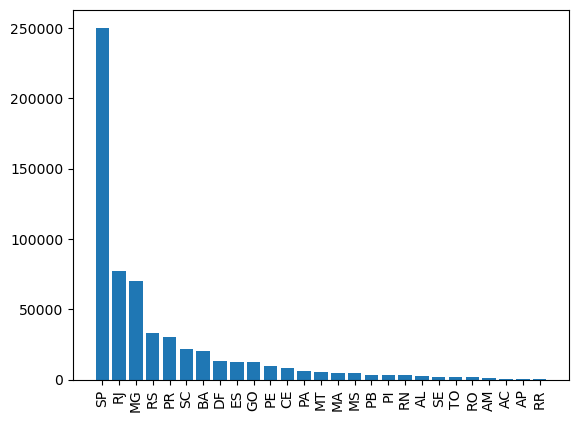

In [29]:
query = """select customer_state,count(customer_id) 
from customers group by customer_state"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns=["state","customer_counts"])
df = df.sort_values(by= "customer_counts",ascending=False)

plt.bar(df["state"],df["customer_counts"])
plt.xticks(rotation =90)
plt.show()

# Calculate the number of orders per month in 2018.


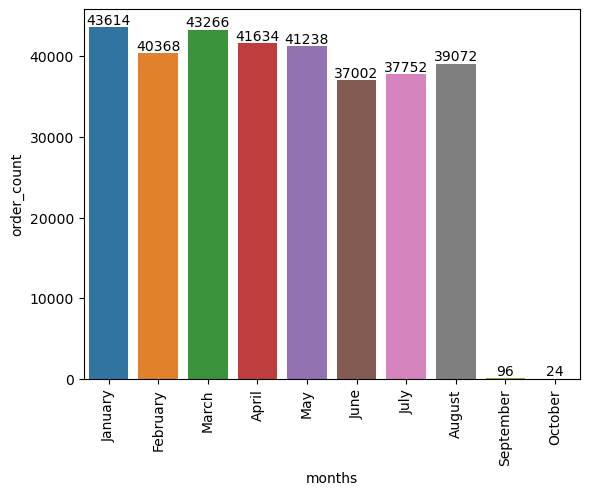

In [42]:
query = """select monthname(order_purchase_timestamp) months, count(customer_id) order_count
from orders where year(order_purchase_timestamp)= 2018
group by months """

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data, columns=["months","order_count"] )
o =["January","February","March","April","May","June","July","August","September","October"]
ax =sns.barplot(x=df["months"],y=df["order_count"],data=df,order = o)
plt.xticks(rotation =90)
ax.bar_label(ax.containers[0])
plt.show()

# Find the average number of products per order, grouped by customer city.

In [8]:
query = """with count_per_order as 
(select orders.order_id, orders.customer_id, count(order_items.order_id) as oc
from orders join order_items
on orders.order_id = order_items.order_id
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders
from customers join count_per_order
on customers.customer_id = count_per_order.customer_id
group by customers.customer_city order by average_orders desc
"""

cur.execute(query)

data = cur.fetchall()
df = pd.DataFrame(data,columns = ["customer city", "average products/order"])
df.head(10)

,customer city,average products/order
0,padre carvalho,294.00
1,celso ramos,273.00
2,datas,252.00
3,candido godoi,252.00
4,matias olimpio,210.00
5,cidelandia,168.00
6,curralinho,168.00
7,picarra,168.00
8,morro de sao paulo,168.00
9,teixeira soares,168.00


# Calculate the percentage of total revenue contributed by each product category.

In [9]:
query = """select upper(products.product_category) category, 
round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) sales_percentage
from products join order_items 
on products.product_id = order_items.product_id
join payments 
on payments.order_id = order_items.order_id
group by category order by sales_percentage desc"""


cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,449.30
1,HEALTH BEAUTY,434.82
2,COMPUTER ACCESSORIES,415.92
3,FURNITURE DECORATION,375.21
4,WATCHES PRESENT,374.96


# Identify the correlation between product price and the number of times a product has been purchased.

In [15]:
cur = db.cursor()
query = """select products.product_category, 
count(order_items.product_id),
round(avg(order_items.price),2)
from products join order_items
on products.product_id = order_items.product_id
group by products.product_category"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data,columns = ["Category", "order_count","price"])

arr1 = df["order_count"]
arr2 = df["price"]

a = np.corrcoef([arr1,arr2])
print("the correlation is", a[0][-1])

the correlation is -0.10631514167157573


# Calculate the total revenue generated by each seller, and rank them by revenue.

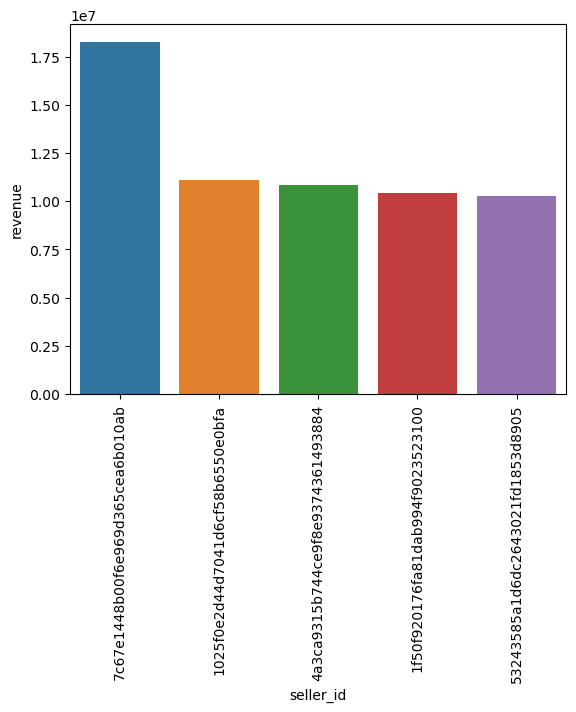

In [10]:
query = """ select *, dense_rank() over(order by revenue desc) as rn from
(select order_items.seller_id, sum(payments.payment_value)
revenue from order_items join payments
on order_items.order_id = payments.order_id
group by order_items.seller_id) as a """

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df = df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

# Calculate the moving average of order values for each customer over their order history.

In [20]:
query = """select customer_id, order_purchase_timestamp, payment,
avg(payment) over(partition by customer_id order by order_purchase_timestamp
rows between 2 preceding and current row) as mov_avg
from
(select orders.customer_id, orders.order_purchase_timestamp, 
payments.payment_value as payment
from payments join orders
on payments.order_id = orders.order_id) as a"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
1,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
2,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
3,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
4,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.739998
...,...,...,...,...
4363207,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
4363208,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
4363209,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001
4363210,ffffe8b65bbe3087b653a978c870db99,2017-09-29 14:07:03,18.37,18.370001


# Calculate the cumulative sales per month for each year.

In [21]:
query = """select years, months , payment, sum(payment)
over(order by years, months) cumulative_sales from 
(select year(orders.order_purchase_timestamp) as years,
month(orders.order_purchase_timestamp) as months,
round(sum(payments.payment_value),2) as payment from orders join payments
on orders.order_id = payments.order_id
group by years, months order by years, months) as a
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,10594.08,1.059408e+04
1,2016,10,2481800.16,2.492394e+06
2,2016,12,824.04,2.493218e+06
3,2017,1,5816497.68,8.309716e+06
4,2017,2,12260136.40,2.056985e+07
5,2017,3,18894271.18,3.946412e+07
6,2017,4,17547097.24,5.701122e+07
7,2017,5,24902590.45,8.191381e+07
8,2017,6,21473607.97,1.033874e+08
9,2017,7,24880082.62,1.282675e+08


# Calculate the retention rate of customers, defined as the percentage of customers who make another purchase within 6 months of their first purchase.

In [19]:
query = """with a as (select customers.customer_id,
min(orders.order_purchase_timestamp) first_order
from customers join orders
on customers.customer_id = orders.customer_id
group by customers.customer_id),

b as (select a.customer_id, count(distinct orders.order_purchase_timestamp) next_order
from a join orders
on orders.customer_id = a.customer_id
and orders.order_purchase_timestamp > first_order
and orders.order_purchase_timestamp < 
date_add(first_order, interval 6 month)
group by a.customer_id) 

select 100 * (count( distinct a.customer_id)/ count(distinct b.customer_id)) 
from a left join b 
on a.customer_id = b.customer_id ;"""

cur.execute(query)
data = cur.fetchall()

data

[(None,)]

# Identify the top 3 customers who spent the most money in each year.

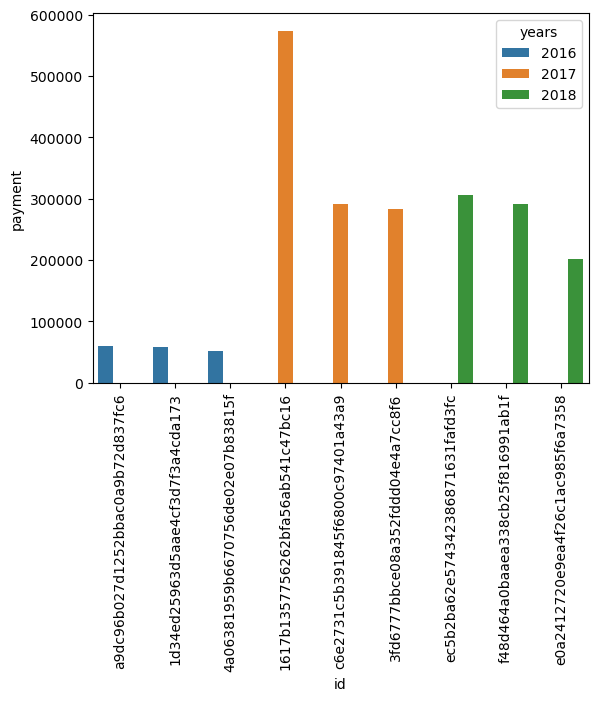

In [13]:
query = """select years, customer_id, payment, d_rank
from
(select year(orders.order_purchase_timestamp) years,
orders.customer_id,
sum(payments.payment_value) payment,
dense_rank() over(partition by year(orders.order_purchase_timestamp)
order by sum(payments.payment_value) desc) d_rank
from orders join payments 
on payments.order_id = orders.order_id
group by year(orders.order_purchase_timestamp),
orders.customer_id) as a
where d_rank <= 3 ;"""

cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns = ["years","id","payment","rank"])
sns.barplot(x = "id", y = "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()